#### Import libraries

In [1]:
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

### EDA

#### File Description

* Vietnamese XSquad dataset: Question-answer pairs dataset released by DeepMind (<a href='https://raw.githubusercontent.com/deepmind/xquad/master/xquad.vi.json'>Link</a>).
    * `data/dev_xsquad.json`

* E2E Question Answering data: Vietnamese text dataset released by Zalo AI Challenge 2022 (<a href='https://www.kaggle.com/datasets/ducnh279/nlp-data'>Link</a>).
    * `zac2022_train_merged_final.json`: dữ liệu train
    * `zac2022_testa_only_question.json`: dữ liệu test

* Bert-Vietnamese-Question-Answering: Vietnamese language dataset for question answering (<a href='https://raw.githubusercontent.com/mailong25/bert-vietnamese-question-answering/master/dataset/train-v2.0.json'>Link</a>).

* `qa_dataset.json`: dataset tổng hợp từ 3 dataset trên.

#### Load Data

In [2]:
df = pd.read_json('../data/qa_dataset.json')
df.head()

,question,context,answer,answer_start,answer_end
0,Đất nước nào không có quân đội,"có 23 quốc gia không có lực lượng quân đội, ba...","Costa Rica, Iceland, Panama, Micronesia, Quần ...",53,126
1,Núi nào cao nhất châu âu,Đỉnh núi nằm ở phần trung tâm của dãy núi Đại ...,núi Elbrus,73,83
2,Thành phố nào là thủ phủ của Ai Cập trong đế q...,"Lịch sử . Ai Cập bị La Mã chiếm năm 30 TCN , v...",Alexandria,48,58
3,Ai là người đứng đầu trong cuộc chống lại chín...,Các nghiên cứu lịch sử cho thấy Cổ Am rất có t...,Lê Chân,65,72
4,Nền văn hoá Phục Hưng bắt nguồn từ nước nào,"Phục Hưng (tiếng Pháp: ""Renaissance"", , , từ ""...",Ý,205,206


In [3]:
print(f'Data Shape: {df.shape}')

Data Shape: (26099, 5)


In [4]:
print(f'Số mẫu của dataset: {df.shape[0]}')

Số mẫu của dataset: 26099


#### Data fields

In [5]:
df.dtypes

question        object
context         object
answer          object
answer_start     int64
answer_end       int64
dtype: object

* `question`: câu hỏi cần trả lời dựa trên ngữ cảnh được cung cấp.
* `context`: ngữ cảnh - văn bản chứa thông tin cần thiết để trả lời câu hỏi.
* `answer`: câu trả lời cho câu hỏi dựa trên ngữ cảnh đã cho.
* `answer_start`: chỉ số vị trí của ký tự đầu tiên của câu trả lời trong *ngữ cảnh*.
* `answer_end`: chỉ số vị trí của ký tự cuối cùng của câu trả lời trong *ngữ cảnh*.

#### Missing Values

In [6]:
def missing_values(df):
    df = pd.DataFrame(df.isnull().sum()).reset_index()
    df.columns = ['features', 'n_missing_values']
    return df
    
missing_values(df)

,features,n_missing_values
0,question,0
1,context,0
2,answer,0
3,answer_start,0
4,answer_end,0


Không có giá trị nào bị thiếu.

#### Visualize

* Độ dài của câu hỏi, ngữ cảnh, câu trả lời và phân phối vị trí bắt đầu và kết thúc của câu trả lời trong ngữ cảnh:

In [7]:
df['question_length'] = df['question'].apply(len)
df['context_length'] = df['context'].apply(len) 
df['answer_length'] = df['answer'].apply(len)
df.describe()

,answer_start,answer_end,question_length,context_length,answer_length
count,26099.000000,26099.000000,26099.000000,26099.000000,26099.000000
mean,285.442277,303.096249,57.449366,684.923101,17.653971
std,280.508057,282.612475,22.063702,388.814958,17.857988
min,0.000000,2.000000,10.000000,16.000000,0.000000
25%,76.000000,92.000000,42.000000,466.000000,8.000000
50%,204.000000,221.000000,54.000000,645.000000,13.000000
75%,423.000000,444.000000,70.000000,863.500000,20.000000
max,2993.000000,3011.000000,196.000000,3980.000000,309.000000


* Vẽ biểu đồ để có cái nhìn trực quan về độ dài câu hỏi, ngữ cảnh và câu trả lời:

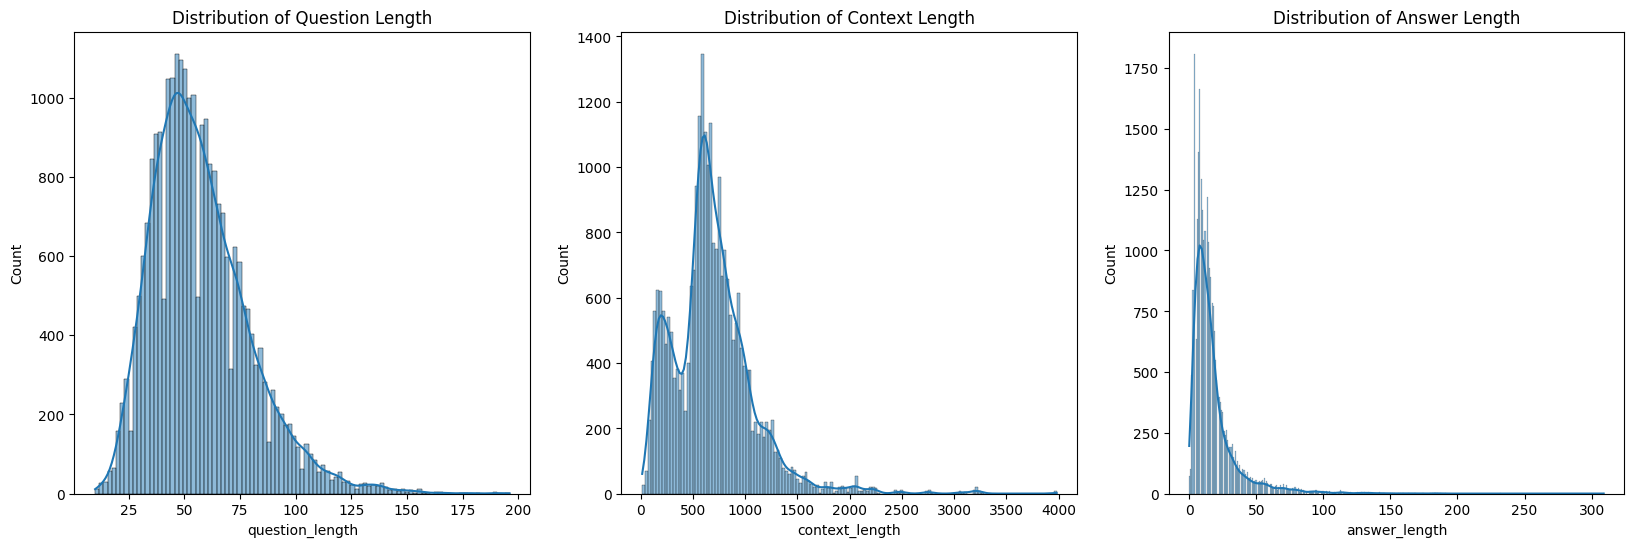

In [8]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
sns.histplot(df['question_length'], kde=True)
plt.title('Distribution of Question Length')

plt.subplot(1, 3, 2)
sns.histplot(df['context_length'], kde=True)
plt.title('Distribution of Context Length')

plt.subplot(1, 3, 3)
sns.histplot(df['answer_length'], kde=True)
plt.title('Distribution of Answer Length')

plt.show()

* Xem xét một số mẫu ví dụ:

In [9]:
for i in range(5):
    print(f"Question: {df.iloc[i]['question']}")
    print(f"Context: {df.iloc[i]['context']}")
    print(f"Answer: {df.iloc[i]['answer']}")
    print(f"Answer Start: {df.iloc[i]['answer_start']}")
    print(f"Answer End: {df.iloc[i]['answer_end']}")
    print('-' * 80)

Question: Đất nước nào không có quân đội
Context: có 23 quốc gia không có lực lượng quân đội, bao gồm: Costa Rica, Iceland, Panama, Micronesia, Quần đảo Marshall, và Vatican...
Answer: Costa Rica, Iceland, Panama, Micronesia, Quần đảo Marshall, và Vatican...
Answer Start: 53
Answer End: 126
--------------------------------------------------------------------------------
Question: Núi nào cao nhất châu âu
Context: Đỉnh núi nằm ở phần trung tâm của dãy núi Đại Kavkaz , phía đông nam của núi Elbrus , ngọn núi cao nhất của châu Âu .
Answer: núi Elbrus
Answer Start: 73
Answer End: 83
--------------------------------------------------------------------------------
Question: Thành phố nào là thủ phủ của Ai Cập trong đế quốc La Mã
Context: Lịch sử . Ai Cập bị La Mã chiếm năm 30 TCN , và Alexandria trở thành thủ phủ của tỉnh Ai Cập trong đế quốc La Mã .
Answer: Alexandria
Answer Start: 48
Answer End: 58
--------------------------------------------------------------------------------
Question: A

Có thể thấy ngữ cảnh là tương đối ngắn và câu trả lời gần như nằm trực tiếp trong ngữ cảnh.

* Nhận thấy có một số dữ liệu trùng lặp. Kiểm tra số câu hỏi, ngữ cảnh và câu trả lời không trùng lặp:

In [10]:
df['question'].duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
26094     True
26095     True
26096     True
26097     True
26098     True
Name: question, Length: 26099, dtype: bool

In [11]:
print(f"Total Unique Questions: {df['question'].nunique()}")
print(f"Total Unique Contexts: {df['context'].nunique()}")
print(f"Total Unique Answers: {df['answer'].nunique()}")

Total Unique Questions: 14357
Total Unique Contexts: 13160
Total Unique Answers: 11476


Nhận xét rằng số câu hỏi (14357) là nhiều hơn số ngữ cảnh (13160), hay có những câu hỏi có cùng ngữ cảnh. Thử xem xét những câu hỏi có cùng câu trả lời:

In [12]:
answer_to_questions = {}

for _, row in df.iterrows():
    answer = row['answer']
    question = row['question']
    
    if answer not in answer_to_questions:
        answer_to_questions[answer] = []
    
    answer_to_questions[answer].append(question)

for answer, questions in answer_to_questions.items():
    print(f"Các câu hỏi có cùng câu trả lời '{answer}':")
    for question in questions:
        print(f"  - {question}")
    print()

Các câu hỏi có cùng câu trả lời 'Costa Rica, Iceland, Panama, Micronesia, Quần đảo Marshall, và Vatican...':
  - Đất nước nào không có quân đội

Các câu hỏi có cùng câu trả lời 'núi Elbrus':
  - Núi nào cao nhất châu âu
  - Núi nào cao nhất châu âu

Các câu hỏi có cùng câu trả lời 'Alexandria':
  - Thành phố nào là thủ phủ của Ai Cập trong đế quốc La Mã
  - Thành phố nào là thủ phủ của Ai Cập trong đế quốc La Mã

Các câu hỏi có cùng câu trả lời 'Lê Chân':
  - Ai là người đứng đầu trong cuộc chống lại chính quyền Đông Hán
  - nữ tướng có công lập vùng đất hải phòng ngày nay
  - nữ tướng của hai bà trưng có công lập nên vùng đất hải phòng ngày nay
  - nữ tướng của hai bà trưng có công lập nên vùng đất hải phòng ngày nay
  - Nữ tướng nào được suy tôn là Thánh chân công chúa
  - nữ tướng có công lập vùng đất hải phòng ngày nay

Các câu hỏi có cùng câu trả lời 'Ý':
  - Nền văn hoá Phục Hưng bắt nguồn từ nước nào
  - Đất nước nào là quê hương của loại pho mát Parmesan
  - Libya từng là thuộc

Như vậy, có một số cặp câu hỏi - câu trả lời trùng nhau và số ít các câu hỏi khác nhau có cùng câu trả lời.

In [13]:
df.drop(['question_length', 'context_length', 'answer_length'], axis=1, inplace=True)

#### Tài liệu tham khảo

* https://www.kaggle.com/code/kabure/qa-eda-and-nlp-modelling-insights-vis-bert)

* https://www.kaggle.com/code/sanikamal/question-answering-eda

* https://github.com/ducnh279/Context-based-Question-Answering-for-Vietnamese?tab=readme-ov-file